In [1]:
pip install tensorflow_datasets

In [7]:

import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [8]:
mnist,mnist_info=tfds.load(name='Mnist', with_info=True, as_supervised=True)

In [4]:
mnist

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\Hp\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [9]:
mnist_train=mnist['train']
mnist_test=mnist['test']

Label: 4


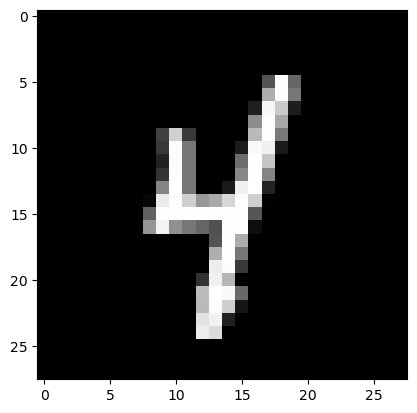

In [16]:
import matplotlib.pyplot as plt
train_images = list(mnist_train)
test_images = list(mnist_test)


mnist_example = train_images[0] # or train_images[1], train_images[2], ...
image, label = mnist_example[0], mnist_example[1]
plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

In [11]:
mnist_val=0.1*mnist_info.splits['train'].num_examples

In [14]:
val_int=tf.cast(mnist_val,tf.int64)

In [17]:
mnist_tests=mnist_info.splits['test'].num_examples

In [19]:
test_int=tf.cast(mnist_tests,tf.int64)

In [38]:
def scale(image,label):
    img=tf.cast(image,tf.float32)
    img/=255.

    return image,label

In [42]:
train_val=mnist_train.map(scale)
test=mnist_test.map(scale)

In [44]:
buffer_size=10000
shuff_train_val=train_val.shuffle(buffer_size)
shuff_test=test.shuffle(buffer_size)

In [47]:
shuff_val=shuff_train_val.take(val_int)
shuff_train=shuff_train_val.skip(val_int)

In [48]:
batch_size=100
batch_train=shuff_train.batch(batch_size)
batch_val=shuff_val.batch(batch_size)

In [50]:
batch_test=test.batch(batch_size)

In [52]:
val_inputs,val_target=next(iter(batch_val))

In [56]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [132]:

input_size=784
hidden_layer_size=76
output_size=10

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size,activation ='softmax')

])

In [133]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [134]:
epochs_no=5

model.fit(batch_train,epochs=epochs_no, validation_data=batch_val,verbose=2 )

Epoch 1/5
540/540 - 2s - 4ms/step - accuracy: 0.8206 - loss: 1.7399 - val_accuracy: 0.8893 - val_loss: 0.4673
Epoch 2/5
540/540 - 1s - 2ms/step - accuracy: 0.9159 - loss: 0.3463 - val_accuracy: 0.9307 - val_loss: 0.2670
Epoch 3/5
540/540 - 1s - 2ms/step - accuracy: 0.9379 - loss: 0.2303 - val_accuracy: 0.9432 - val_loss: 0.2253
Epoch 4/5
540/540 - 1s - 2ms/step - accuracy: 0.9476 - loss: 0.1861 - val_accuracy: 0.9495 - val_loss: 0.1691
Epoch 5/5
540/540 - 1s - 2ms/step - accuracy: 0.9556 - loss: 0.1576 - val_accuracy: 0.9553 - val_loss: 0.1485


In [137]:
test_acc,test_loss=model.evaluate(batch_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2005
